In [9]:
from data_loaders import load_AUCS, display_MLG
from sc_ged import SC_GED
from evaluate import evaluate_model
from utils import modularity

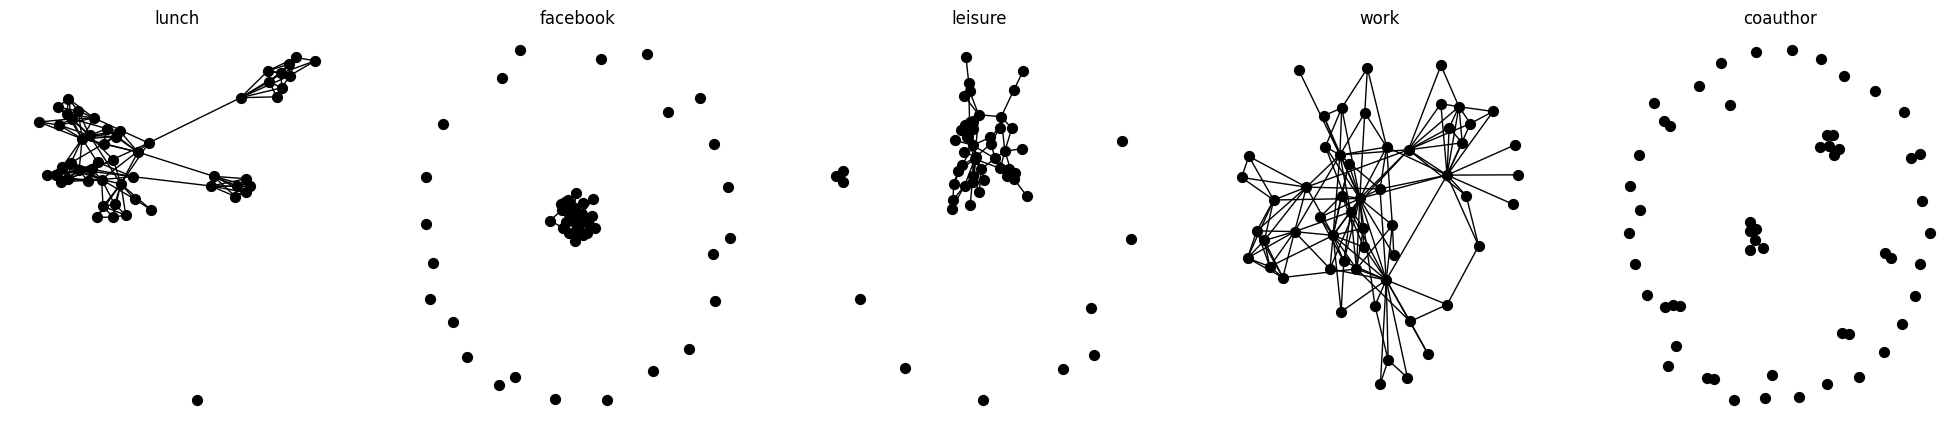

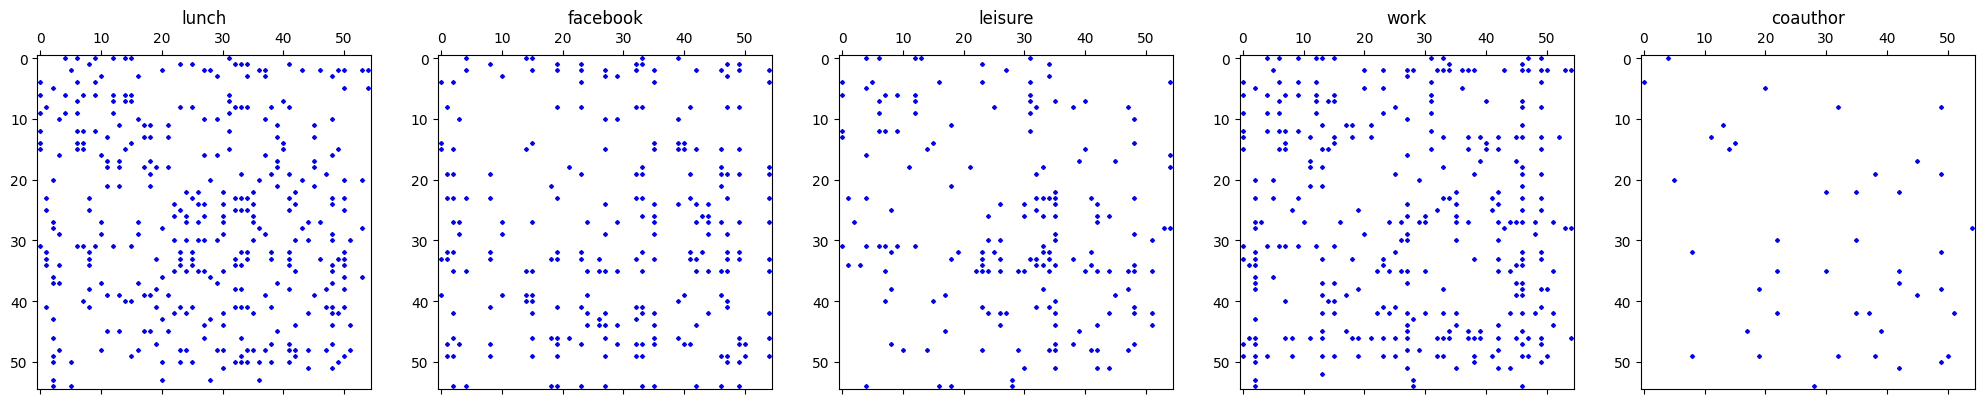

In [10]:
MLG, layer_labels, true_labels = load_AUCS()
display_MLG(MLG, layer_labels)

start decomposition


Joint Eigen Decomposition: 100%|██████████| 1000/1000 [00:18<00:00, 52.90it/s]


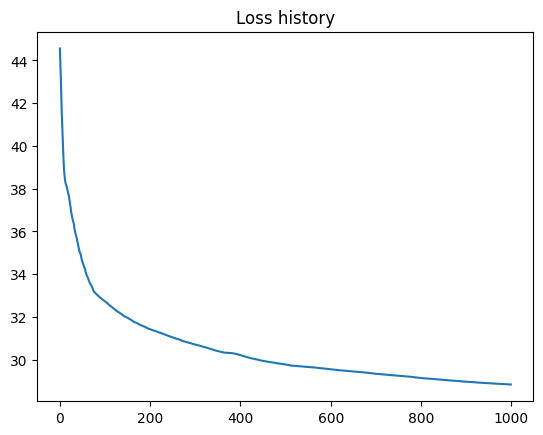

norm of P: 7.949717998504639
norm of Q: 7.8876543045043945
norm of P @ Q - I: 0.07681446522474289
Best accuracy: 0.8363636363636363


In [14]:
model = SC_GED(MLG, k=7, most_informative=4, alpha=0.5, beta=20)
clustering = evaluate_model(model, true_labels, n_iter=1_000)


In [18]:
for layer, G in zip(layer_labels, MLG):
    m = modularity(G, clustering)
    print(f"Modularity of layer based on clustering {layer}: {m:.4f}")

Modularity of layer based on clustering lunch: 0.5386
Modularity of layer based on clustering facebook: 0.2266
Modularity of layer based on clustering leisure: 0.4992
Modularity of layer based on clustering work: 0.4238
Modularity of layer based on clustering coauthor: 0.7132


Results:
* requires manually choosing beta and alpha for each specific case which is not always ideal when we don't have the real labels: very sensitive to alpha and beta values
* Requires a lot of comupations to find the eigenvalues of all layers and eigenvectors of the most informative layer: not suited for high dimentional datasets
* Modularity is high for coauthor layer as we put it as the most informative but also because members of the same group would more likely co-author together. Then there's the lunch and leisure which makes sense because if you work together you will more likely have outside activities together or eat together at lunch. The work was expected to be higher but maybe lunch groups can include different people from the group but not necessarily directly work together during working hours. Finally, the facebook has the lowest modularity as people from different working groups can be friends on social media with anyone from work. 

Ideas to implement:
* See how the data_fidelity, sparsity, orthogonality terms evolve over iterations (Normalize maybe and see the difference in scale to find the best beta and alpha)

* Evaluate the impact of different alpha and beta values to conclude the sensitivity of the model to hyperparams

* Implement more evaluation metrics like the ones in the paper

* Test this on a big graph dataset to conclude that it's not suitable for big datasets

* Show how the first eigen vectors can be mapped to 1D dimension 

* Maybe find more datasets with labels this time

